In [1]:
import json
import h5py
from load_data import *
from model import *
import matplotlib.pyplot as plt
import tensorflow as tf 
import os 

Importamos los ground truth del conjunto de entrenamiento y test. 

In [2]:
json_train = open('JSON FILES\DTS_SG_part_A.json')
json_test = open('JSON FILES\DTS_SG_part_A_TEST.json')
paths_train = json.load(json_train)
paths_test = json.load(json_test)

#Cargamos la data 
train_GT = mLoad_GT(paths_train, n=10)
train_img = mLoad_Img(paths_train, n=10)

test_GT = mLoad_GT(paths_test, n=5)
test_img = mLoad_Img(paths_test, n=5)

Construimos la red neuronal. Este sera un prototipo hasta siguiente cambio

In [3]:
input_shape = train_img[0,:,:,:].shape
model = Betsy(input_shape)

model.compile(loss = GAME_loss,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), 
              metrics = [sMAE(), RMSE()])

In [95]:
model.build_graph(input_shape).summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768, 1024, 1)]    0         
                                                                 
 ftgd_conv_layer_2 (FTGDConv  (None, 768, 1024, 16)    240       
 Layer)                                                          
                                                                 
 activation_2 (Activation)   (None, 768, 1024, 16)     0         
                                                                 
 ftgd_conv_layer_3 (FTGDConv  (None, 768, 1024, 32)    3312      
 Layer)                                                          
                                                                 
 activation_3 (Activation)   (None, 768, 1024, 32)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 768, 1024, 1)      33    

Entrenamos un poco para testeo!

In [4]:
#checkpoint_path = "training/cp.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)


# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=True,
#                                                 verbose=1)


history = model.fit(train_img, 
                    train_GT, 
                    batch_size = 10, 
                    epochs = 1, 
                    validation_data=(test_img, test_GT)) #, 
                    #callbacks=[cp_callback])

1/1 [==============================] - 154s 154s/step - loss: 139896.2656 - sMAE: 0.0000e+00 - RMSE: 0.0000e+00 - val_loss: 143.3470 - val_sMAE: 0.0000e+00 - val_RMSE: 0.0000e+00


In [5]:
model.layers[0].deploy()
model.layers[1].deploy()

In [6]:
tt = model(test_img)

In [9]:
def plotting(i):
    font = {'color':  'black','weight': 'normal','size': 16}

    fig = plt.figure(figsize=(16, 4), constrained_layout=True)
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(test_img[i,:,:,0], cmap = 'gray')
    ax1.axis('off')
    ax1.set_title('Imagen Real', fontdict=font)
    ax1.text(0.1, -0.1, 'right bottom',
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax1.transAxes, )

    ax2 = fig.add_subplot(1,3,2)
    ax2.set_title('GT', fontdict=font)
    ax2.imshow(test_GT[i,:,:,0], interpolation='gaussian')
    ax2.axis('off')

    ax3 = fig.add_subplot(1,3,3)
    ax3.set_title('Densidad Estimada', fontdict=font)
    ax3.imshow(tt[i,:,:,0], interpolation='gaussian')
    ax3.axis('off')


    fig.savefig('plots/test_' + str(i) + '.png');

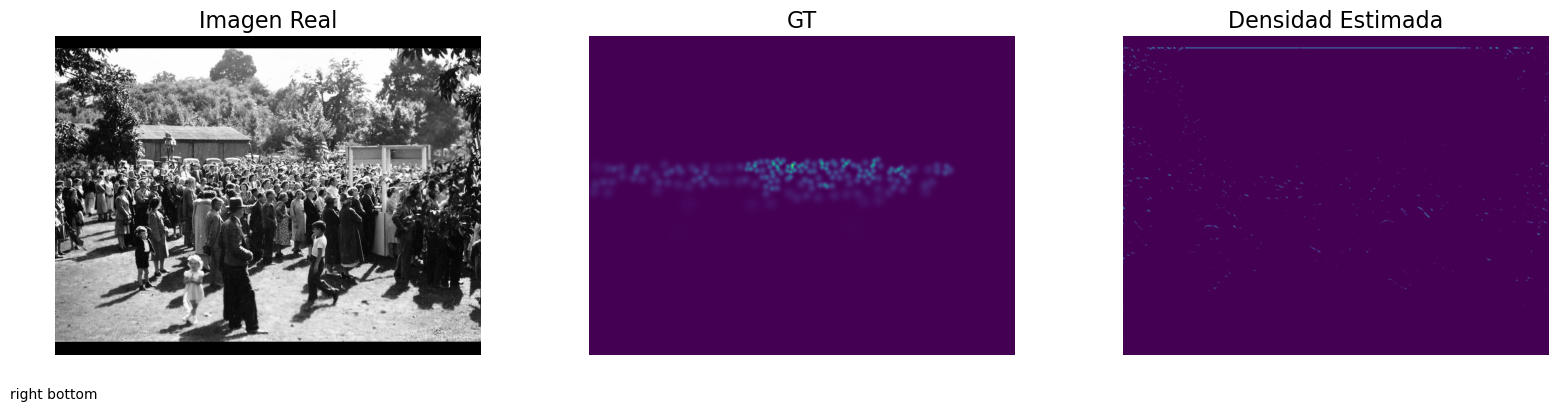

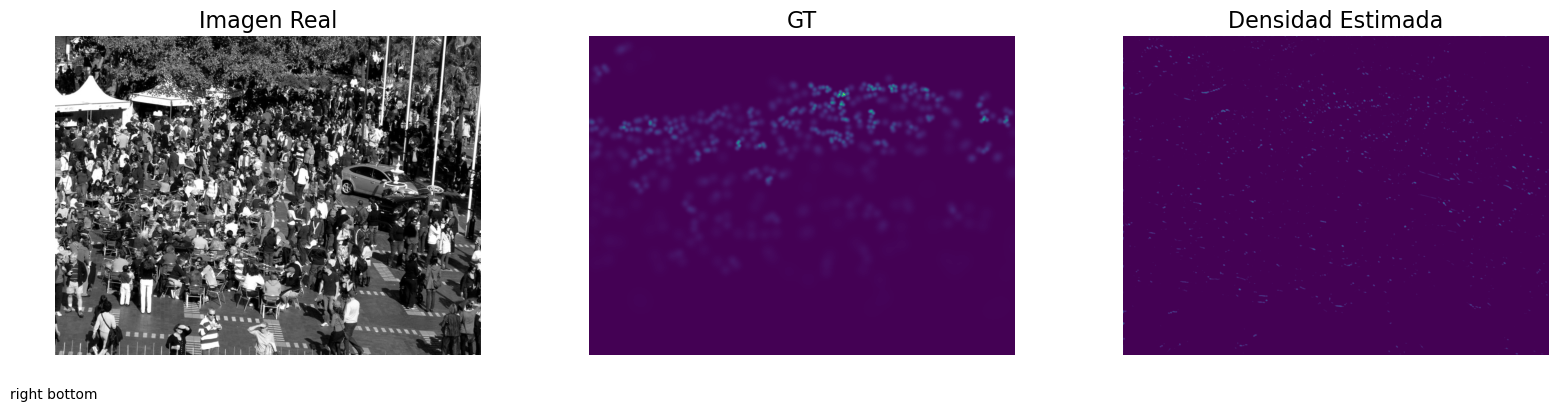

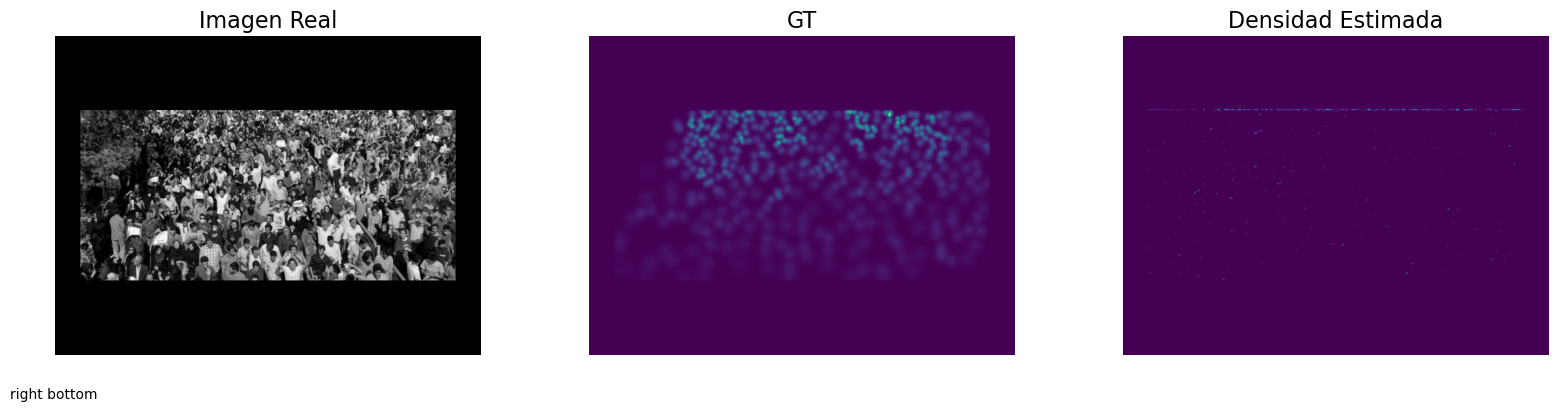

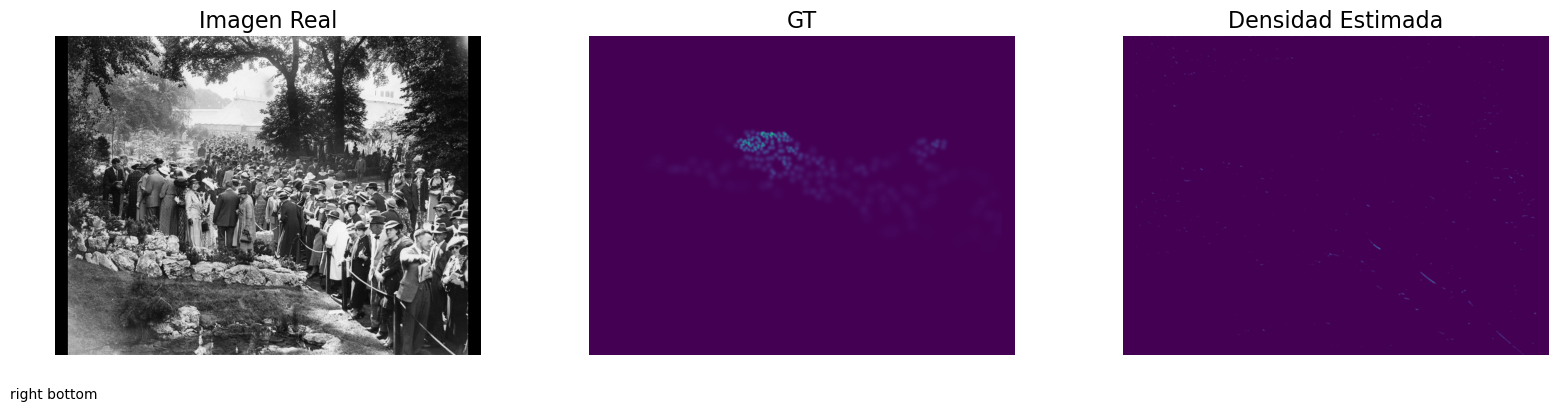

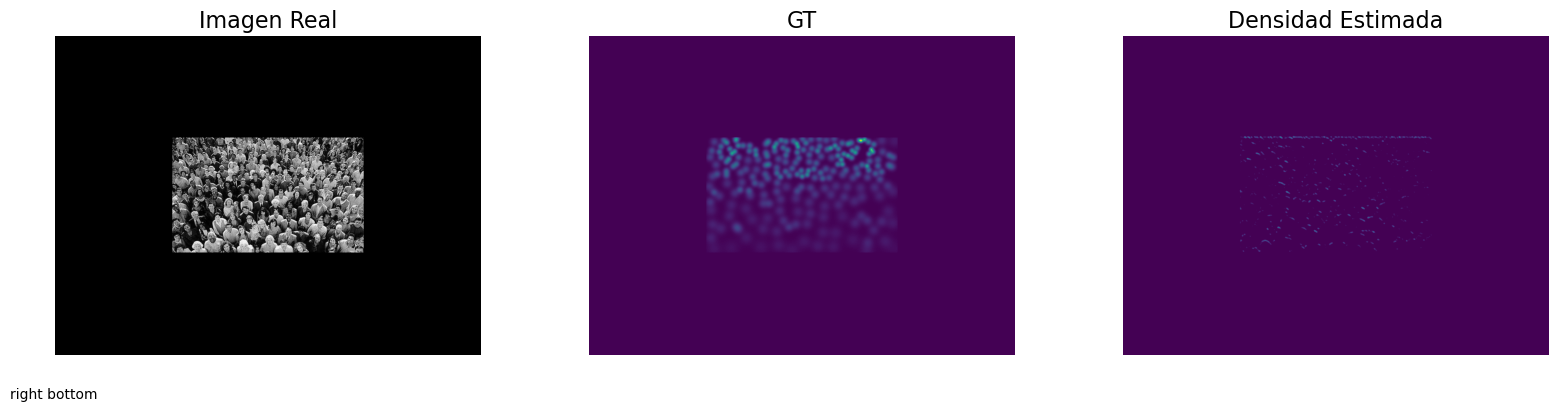

In [10]:
for i in range(len(test_GT)):
    plotting(i)

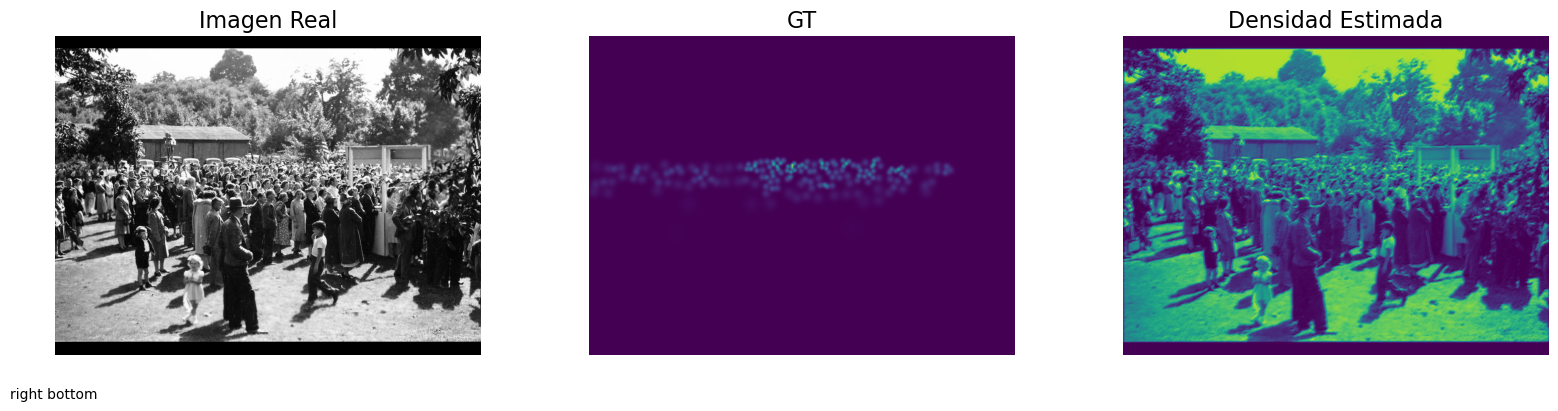

In [6]:
tt = model(test_img)

font = {'color':  'black',
        'weight': 'normal',
        'size': 16}

fig = plt.figure(figsize=(16, 4), constrained_layout=True)
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(test_img[0,:,:,0], cmap = 'gray')
ax1.axis('off')
ax1.set_title('Imagen Real', fontdict=font)
ax1.text(0.1, -0.1, 'right bottom',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax1.transAxes, )

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('GT', fontdict=font)
ax2.imshow(test_GT[0,:,:,0], interpolation='gaussian')
ax2.axis('off')

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Densidad Estimada', fontdict=font)
ax3.imshow(tt[0,:,:,0], interpolation='gaussian')
ax3.axis('off')


fig.savefig('fif.jpg')

In [11]:
score = model.evaluate(test_img, test_GT, verbose = 0)
print('Test Mean Squared Error : %.2f and Test Loss : %.3f' % (score[1]*100, score[0]))

Test Mean Squared Error : 0.00 and Test Loss : 143.347


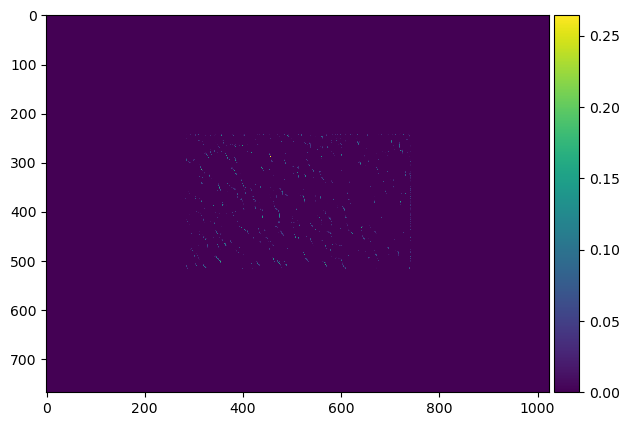

In [15]:
from skimage import io

io.imshow(tt[4,:,:,0].numpy())